In [1]:
import numpy as np
import cupy as cp
import ray
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload

import warnings
warnings.filterwarnings("ignore")

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import cgi_phasec_poppy
from cgi_phasec_poppy import ensure_np_array
from cgi_phasec_poppy.imshows import *

iwa = 6
owa = 20

data_dir = cgi_phasec_poppy.data_dir


# Test monochromatic PSFs.

0.1 0.005018897251342104 arcsec / pix
Propagating wavelength 575.000 nm.
PSF calculated in 0.356s


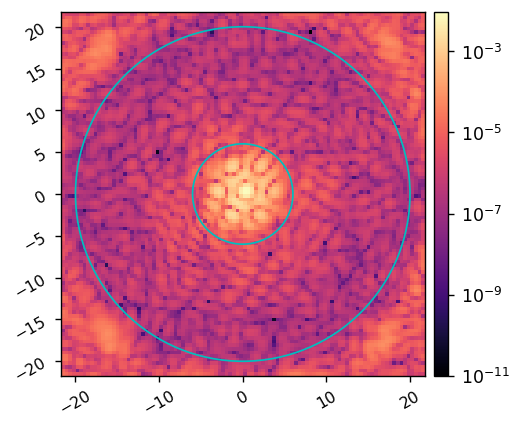

In [2]:
reload(cgi_phasec_poppy.cgi)
mode = cgi_phasec_poppy.cgi.CGI(cgi_mode='spc-wide_band1', npsf=100,
                                use_pupil_defocus=True, use_opds=True)


mode.use_fpm = False
wf = mode.calc_psf(quiet=False)
unocc_psf = np.abs(wf)**2

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(unocc_psf, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches, vmin=1e-11)

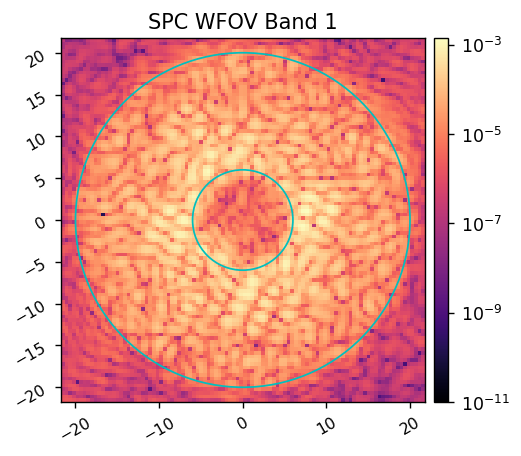

In [3]:
mode.Imax_ref = unocc_psf.max()
mode.use_fpm = True
psf = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(psf, 'SPC WFOV Band 1', lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches, vmin=1e-11)